In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


<AxesSubplot:>

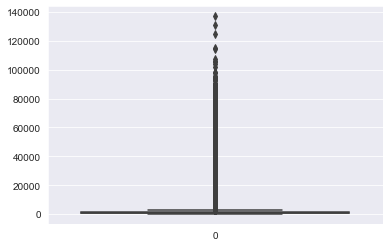

In [4]:
sns.boxplot (data = csv1.execution_time)

In [5]:
csv1 = csv1[csv1.execution_time < 20000]

<AxesSubplot:>

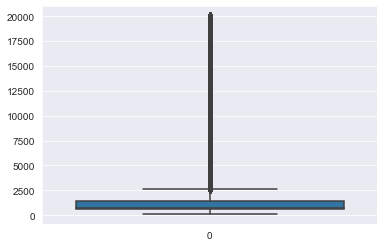

In [6]:
sns.boxplot (data = csv1.execution_time)

In [7]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [8]:
data1 = data.drop(csv1.index[1000:]) 
#data.head()

In [9]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
1003,@HWI-D00360:5:H814YADXX:1:1101:19592:2337 1:N:...,CAGAAAGAGTGTTTCGAAACTGCTGTTTCAAAAGGAATCTTCAACT...,CC@FFFF?HACCFBHIGGGGHGIGHHIGDGEIGHEFIIIJJIGHHG...,1048.375
1004,@HWI-D00360:5:H814YADXX:1:1101:19615:2347 1:N:...,AACATAAGCAGGAAAGCTAGCCCCAAGAGATATGCTTGGTTACTTT...,CCCFFFFFHGHHFJJJJJJJJJJJJJJJJIJJJJJJJJJIJJJJJJ...,223.208
1005,@HWI-D00360:5:H814YADXX:1:1101:19593:2382 1:N:...,AACCCTAAACCTGCTTACCCTGTCTGGCCCTTTCCTTCCCATGAAA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJIJJJJJ...,667.000
1006,@HWI-D00360:5:H814YADXX:1:1101:19520:2416 1:N:...,AGATTTAAGGATATGTCAAATTAAAGCAAATCGGGGCTTAAAGAGA...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJJ...,616.875
1007,@HWI-D00360:5:H814YADXX:1:1101:19710:2427 1:N:...,AAGTATCCGCTTGTAGATTTTACTAAAAGAGTGTTTCCAAACTGCT...,CCCFFFFFHHHGHJJJIJJJJJJJJJJJJJJHIIGIJJJJJJJJJJ...,13568.459


In [10]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
1003,CAGAAAGAGTGTTTCGAAACTGCTGTTTCAAAAGGAATCTTCAACT...,1048.375
1004,AACATAAGCAGGAAAGCTAGCCCCAAGAGATATGCTTGGTTACTTT...,223.208
1005,AACCCTAAACCTGCTTACCCTGTCTGGCCCTTTCCTTCCCATGAAA...,667.000
1006,AGATTTAAGGATATGTCAAATTAAAGCAAATCGGGGCTTAAAGAGA...,616.875


In [11]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
1003,CAGAAAGAGTGTTTCGAAACTGCTGTTTCAAAAGGAATCTTCAACT...,3.020517
1004,AACATAAGCAGGAAAGCTAGCCCCAAGAGATATGCTTGGTTACTTT...,2.348710
1005,AACCCTAAACCTGCTTACCCTGTCTGGCCCTTTCCTTCCCATGAAA...,2.824126
1006,AGATTTAAGGATATGTCAAATTAAAGCAAATCGGGGCTTAAAGAGA...,2.790197


In [12]:
def Kmers_funct(seq, size=9):
   return [seq[x:x+size].upper() for x in range(len(seq) - size + 1)]
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)


In [13]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
Y = reads.iloc[:, 0].values # y_human for human_dna

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4)
X = cv.fit_transform(human_texts)

In [15]:
# X = X.todense()
X = X.toarray()
X

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1) 
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (800, 128703)
X_test (200, 128703)
y_train (800,)
y_test (200,)


In [17]:
#y_test

In [43]:
import tensorflow as tf
from tensorflow import keras

In [44]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 64
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim = X_train.shape[1]),
 #   keras.layers.Dense(128, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
#     keras.layers.Dense(256, activation=tf.nn.relu),
#     keras.layers.Dense(256, activation=tf.nn.relu),
#     keras.layers.Dropout(0.5),
    #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
   #keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1) #, activation=tf.nn.relu # , activation= 'linear'
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                8237056   
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,237,121
Trainable params: 8,237,121
Non-trainable params: 0
_________________________________________________________________


In [45]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=30)

In [46]:
#history = model.fit(X_train, y_train, epochs=300, batch_size=128, verbose=True, validation_data = (X_test,y_test))
history = model.fit(X_train, y_train, epochs=1000, batch_size= 1024, verbose=True, validation_split = 0.2,  callbacks = [callback])

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 8.9513 - accuracy: 0.0000e+00 - val_loss: 8.5131 - val_accuracy: 0.0000e+00
Epoch 2/1000
1/1 [==============================] - 0s 409ms/step - loss: 6.3820 - accuracy: 0.0000e+00 - val_loss: 8.2177 - val_accuracy: 0.0000e+00
Epoch 3/1000
1/1 [==============================] - 0s 336ms/step - loss: 4.4763 - accuracy: 0.0000e+00 - val_loss: 7.9217 - val_accuracy: 0.0000e+00
Epoch 4/1000
1/1 [==============================] - 0s 390ms/step - loss: 2.8392 - accuracy: 0.0000e+00 - val_loss: 7.6403 - val_accuracy: 0.0000e+00
Epoch 5/1000
1/1 [==============================] - 0s 367ms/step - loss: 1.5672 - accuracy: 0.0000e+00 - val_loss: 7.3837 - val_accuracy: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 386ms/step - loss: 0.7218 - accuracy: 0.0000e+00 - val_loss: 7.1613 - val_accuracy: 0.0000e+00
Epoch 7/1000
1/1 [==============================] - 0s 380ms/step - loss: 0.3090 - accuracy: 0.0000e+00

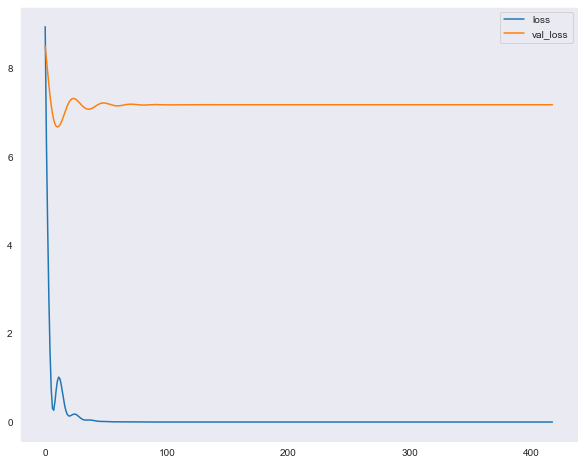

In [47]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
#plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
#plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [48]:
ypred = model.predict(X_test)

7/7 [==============================] - 0s 11ms/step


In [49]:
ypred.shape

(200, 1)

In [50]:
 from sklearn.metrics import r2_score
# r2_train = r2_score(X_train,y_train)
# r2_train

In [51]:
r2_test = r2_score (y_test,ypred)
r2_test 

-43.69812389748822

In [52]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, ypred))
rmse 

2.698341997850272

In [53]:
from sklearn.metrics import mean_squared_error
print("MSE: %.4f" % mean_squared_error(y_test, ypred))

MSE: 7.2810


In [54]:
from sklearn.metrics import mean_squared_log_error
# rmsle = mean_squared_log_error(y_test,ypred)**0.5
# rmsle

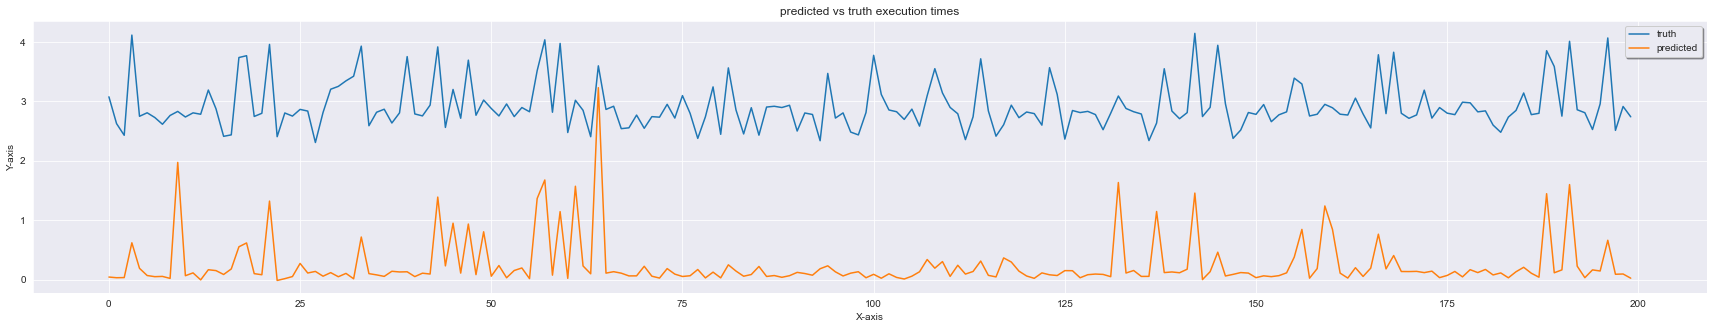

In [55]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax,y_test, label="truth")
plt.plot(x_ax, ypred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [56]:
y_pred_non_log = 10**(ypred)
y_test_non_log = 10**(y_test)

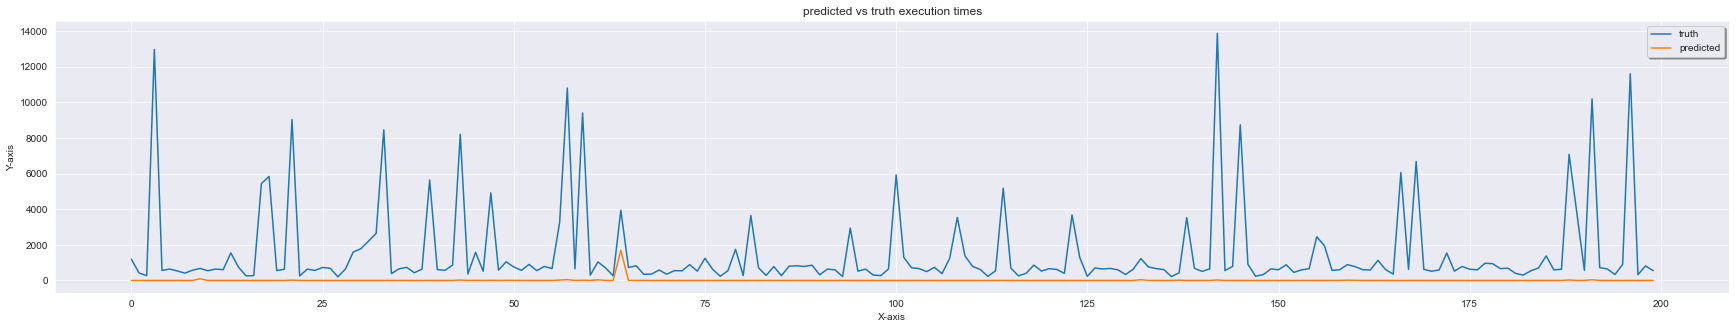

In [57]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax,y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [58]:
print('ypred max = {}'.format(ypred.max()))
print('y_test  max = {}'.format(y_test.max()))
print('ypred min = {}'.format(ypred.min()))
print('y_test min ={}'.format(y_test.min()))

ypred max = 3.2285256385803223
y_test  max = 4.14198120017126
ypred min = -0.0125137809664011
y_test min =2.3069608628831935


In [65]:
#ypred

In [66]:
#y_test

In [67]:
#y_pred_non_log

In [68]:
#y_test_non_log

In [63]:
from sklearn.metrics import mean_squared_log_error
rmsle_non_log = mean_squared_log_error(y_test_non_log,y_pred_non_log)**0.5
rmsle_non_log

5.698991561096099

In [64]:
r2_test_non_log = r2_score (y_test_non_log,y_pred_non_log)
r2_test_non_log 

-0.3838948690310384